In [1]:
import numpy as np
from PIL import Image

from exp.params import OBJ_INDEX_LIST, GRASP_PROFILES

ROBOT_NAME = "skeletonhand"# "shadowhand" # "allegro"
grasp_profile = GRASP_PROFILES[ROBOT_NAME]

In [2]:
SUCESS_PERCENTAGE = 20
print("SUCESS_PERCENTAGE: ", SUCESS_PERCENTAGE)
result_file_path = "/home/yizhou/Research/Data/skeleton_exp_cliport824.txt"
MODEL_PATH = "/home/yizhou/Research/temp0/fasterrcnn_resnet50_fpn824.pth"

SUCESS_PERCENTAGE:  20


In [3]:
SHOW_IMAGE = True

In [4]:
import getpass
user = getpass.getuser()

usd_path = grasp_profile["usd_path"]
print(usd_path)

from omni.isaac.kit import SimulationApp    

omniverse://localhost/Users/yizhou/scene3.usd


In [5]:
simulation_app = SimulationApp({"headless": True, "open_usd": usd_path,  "livesync_usd": usd_path}) 

Starting kit application with the fillowing args:  ['/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps', '--portable', '--no-window']
Passing the following args to the base kit application:  ['-f', '/home/yizhou/.local/share/jupyter/runtime/kernel-89db7c32-aa5d-4ad5-bfe1-04cb6e30fbea.json

OmniAssetFileFormat


[2.111s] [ext: omni.mdl-0.1.0] startup
[2.146s] [ext: omni.kit.menu.create-1.0.2] startup
[2.148s] [ext: omni.kit.window.file_exporter-1.0.4] startup
[2.149s] [ext: omni.kit.window.drop_support-1.0.0] startup
[2.151s] [ext: omni.kit.material.library-1.3.10] startup
[2.156s] [ext: omni.kit.window.property-1.6.3] startup
[2.159s] [ext: omni.kit.context_menu-1.3.9] startup
[2.165s] [ext: omni.kit.window.file_importer-1.0.4] startup
[2.167s] [ext: omni.kit.stage_templates-1.1.2] startup
[2.170s] [ext: omni.kit.widget.stage-2.6.15] startup
[2.177s] [ext: omni.kit.window.file-1.3.16] startup
[2.181s] [ext: omni.debugdraw-0.1.0] startup
[2.188s] [ext: omni.kit.window.content_browser-2.4.28] startup
[2.202s] [ext: omni.kit.widget.prompt-1.0.1] startup
[2.204s] [ext: omni.kit.property.usd-3.14.8] startup
[2.248s] [ext: omni.hydra.engine.stats-1.0.0] startup
[2.256s] [ext: omni.kit.widget.settings-1.0.0] startup
[2.258s] [ext: omni.graph.tools-1.3.5] startup
[2.345s] [ext: omni.graph.core-2.27.0

2022-08-25 23:43:54 [2,530ms] [Error] [rtx.neuraylib.plugin] [DYNLIB:IO]   0.1   DYNLIB io   error: /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so: cannot open shared object file: No such file or directory
2022-08-25 23:43:54 [2,530ms] [Error] [rtx.neuraylib.plugin] [INDEX:MAIN]   0.1   INDEX  main error: Failed to load /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so


Warp initialized:
   Version: 0.2.1
   Using CUDA device: NVIDIA GeForce RTX 3090
   Using CPU compiler: /usr/bin/g++
[3.530s] [ext: omni.kit.window.preferences-1.2.1] startup
[3.575s] [ext: omni.kit.ui_test-1.2.0] startup
[3.578s] [ext: omni.graph.ui-1.6.1] startup
[3.614s] [ext: omni.kvdb-0.0.0] startup
[3.619s] [ext: omni.kit.widget.searchfield-1.0.6] startup
[3.624s] [ext: omni.convexdecomposition-1.4.12] startup
[3.633s] [ext: omni.graph.action-1.17.0] startup
[3.653s] [ext: omni.localcache-0.0.0] startup
[3.658s] [ext: omni.usdphysics-1.4.12] startup
[3.661s] [ext: omni.graph.scriptnode-0.5.0] startup
[3.665s] [ext: omni.physx-1.4.12-5.1] startup
2022-08-25 23:43:55 [3,669ms] [Warning] [omni.kvdb.plugin] wasn't able to load the meta database, trying to repair it ...
2022-08-25 23:43:55 [3,835ms] [Warning] [omni.kvdb.plugin] repair failed
[3.853s] [ext: omni.kit.usd_undo-0.1.0] startup
[3.858s] [ext: omni.graph.nodes-1.25.0] startup
[3.889s] [ext: omni.physx.commands-1.4.12-5.1] s

In [6]:
# world
import omni
from omni.isaac.core import World
world = World()


In [7]:
# reset scene
mobility_prim = world.scene.stage.GetPrimAtPath("/World/Game/mobility")
if mobility_prim:
    omni.kit.commands.execute("DeletePrims", paths=["/World/Game/mobility"])

In [8]:
# reset scene
replicator_prim = world.scene.stage.GetPrimAtPath("/Replicator")
if replicator_prim:
    omni.kit.commands.execute("DeletePrims", paths=["/Replicator"])


In [9]:
# custom import
from open_env import OpenEnv
from hand_env import HandEnv
from hand_common import HandBase
from render.utils import prim_random_color, LOOKS_PATH

from task.checker import TaskChecker
from task.instructor import SceneInstructor
from omni.isaac.core.prims.xform_prim import XFormPrim

env = OpenEnv()
env.add_camera()
env.setup_viewport()

In [10]:
controller = HandBase(grasp_profile["articulation_root"], "/World/AnchorXform")
controller.grasp_profile = grasp_profile["offset"]


In [11]:
grasp_profile["robot_path"]

'/World/Hand'

In [12]:
# init
world.reset()
controller.start()
world.scene.add(controller.robots)

simlation context numpy None
num_envs 1


In [13]:
# hide robot
hand_prim = world.scene.stage.GetPrimAtPath(grasp_profile["robot_path"])
hand_prim.GetAttribute('visibility').Set('invisible')

True

In [14]:
world.step(render=True)

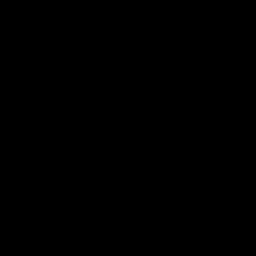

In [15]:
env.get_image()

# !Cliport?

In [16]:
# load deep leanrning model
from exp.model import load_vision_model

MODEL_PATH = "/home/yizhou/Research/temp0/custom_cliport824.pth"
model = load_vision_model(model_path = MODEL_PATH, model_name = "custom_cliport")

Some weights of the model checkpoint at microsoft/resnet-18 were not used when initializing ResNetModel: ['classifier.1.bias', 'classifier.1.weight']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
OBJ_INDEX = 0

In [18]:
env.add_object(OBJ_INDEX, scale = 0.1)

mobility_obj = XFormPrim("/World/Game/mobility")
mobility_obj_name = mobility_obj.name

# randomize color

# reset look in scene
mat_look_prim = world.scene.stage.GetPrimAtPath(LOOKS_PATH)
if mat_look_prim:
    omni.kit.commands.execute("DeletePrims", paths=[LOOKS_PATH])

world.step(render = False)

scene_instr = SceneInstructor()
scene_instr.analysis()

handle_num = len(list(scene_instr.valid_handle_list.keys()))

for HANDLE_INDEX in range(handle_num):
    handle_path_str = list(scene_instr.valid_handle_list.keys())[HANDLE_INDEX]
    prim_random_color(handle_path_str)
    
world.scene.add(mobility_obj)
world.reset()
world.render()

add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_7/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
p
[7.661s] [ext: omni.isaac.surface_gripper-0.1.2] startup
[7.670s] [ext: omni.kit.property.layer-1.1.2] startup
[7.672s] [ext: omni.isaac.range_sensor-0.4.2] startup
[7.706s] [ext: omni.graph.window.generic-1.3.8] startup
[7.709s] [ext: omni.isaac.utils-0.1.11] startup
[7.715s] [ext: omni.isaac.universal_robots-0.2.1] startup
[7.716s] [ext: omni.kit.property.audio-1.0.5] startup
[7.719s] [ext: omni.kit.property.skel-1.0.1] startup
[7.721s] [ext: omni.kit.property.render-1.1.0] startup
[7.723s] [ext: omni.kit.property.camera-1.0.3] startup
[7.725s] [ext: om

2022-08-25 23:44:15 [23,175ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_12 has corrupted data in primvar st: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-25 23:44:15 [23,175ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_11 has corrupted data in primvar st_1: buffer size 30 doesn't match expected size 72 in faceVarying primvars
2022-08-25 23:44:15 [23,175ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_12 has corrupted data in primvar st_1: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-25 23:44:15 [23,175ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_horizontal_bar_29 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-25 23:44:15 [23,175ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_0/visuals/cabinet_door_surface_6 

2022-08-25 23:44:15 [23,293ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_horizontal_bar_27 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-25 23:44:15 [23,293ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_horizontal_bar_28 has corrupted data in primvar st: buffer size 24 doesn't match expected size 48 in faceVarying primvars
2022-08-25 23:44:15 [23,293ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_horizontal_bar_29 has corrupted data in primvar st: buffer size 18 doesn't match expected size 48 in faceVarying primvars
2022-08-25 23:44:15 [23,293ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_horizontal_bar_29 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-25 23:44:15 [23,293ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_p

In [19]:
world.step(render = True)
world.render()
image_array =env.get_image(return_array=True)

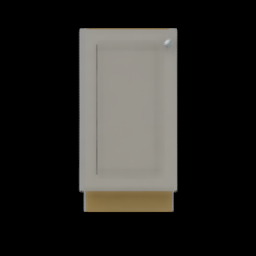

In [20]:
image = env.get_image()
image.convert('RGB')

In [21]:
import matplotlib.pyplot as plt

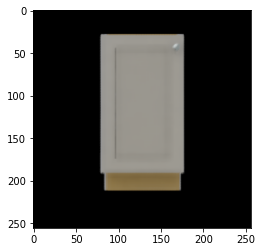

In [22]:
plt.imshow(image)

In [23]:
scene_instr.valid_handle_list

{'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint',
  'cabinet_type': 'door',
  'vertical_description': '',
  'horizontal_description': '',
  'joint': 'joint_0',
  'relative_to_game_center': 'right',
  'direction': 'horizontal'}}

In [24]:
scene_instr.valid_handle_list

{'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint',
  'cabinet_type': 'door',
  'vertical_description': '',
  'horizontal_description': '',
  'joint': 'joint_0',
  'relative_to_game_center': 'right',
  'direction': 'horizontal'}}

In [25]:
HANDLE_INDEX = 0

handle_path_str = list(scene_instr.valid_handle_list.keys())[HANDLE_INDEX]
h_desc = scene_instr.valid_handle_list[handle_path_str]["horizontal_description"]
v_desc = scene_instr.valid_handle_list[handle_path_str]["vertical_description"]

handle_joint_type = scene_instr.valid_handle_list[handle_path_str]["joint_type"]
handle_joint = scene_instr.valid_handle_list[handle_path_str]["joint"]
# handle_rel_direciton = scene_instr.valid_handle_list[handle_path_str]["relative_to_game_center"]

cabinet_type = scene_instr.valid_handle_list[handle_path_str]["cabinet_type"]
# add_update_semantics(prim, "handle")

text = f"{v_desc}_{h_desc}_{cabinet_type}"
text = text.replace("_"," ").replace("-"," ").replace("  ", " ").strip()
print(text)


door


In [26]:
model = model.cuda()

In [27]:
bbox_center, handle_direction = model.pred_box_pos_and_dir(image.convert('RGB'), text)

In [28]:
bbox_center

(37, 155)

In [29]:
the_box = scene_instr.get_bbox_world_position([bbox_center[1], bbox_center[0], bbox_center[1], bbox_center[0]])

In [30]:
the_box

[-0.14915150170648464,
 1.0026958020477816,
 -0.14915150170648464,
 1.0026958020477816]

In [ ]:
# -------------------- RESNET

In [ ]:
scene_instr.model = model
scene_instr.predict_bounding_boxes(image_array[:,:,:3])

# if not valid
if not scene_instr.is_obj_valid:
    print("object not valid: ", OBJ_INDEX)
    simulation_app.close()
    exit()

# if no valid predicted boundbox
if not scene_instr.is_pred_valid:
    with open(result_file_path, "a") as f:
        f.write(f"{OBJ_INDEX}, invalid prediction\n")

    world.scene.remove_object(mobility_obj_name)
    world.reset()
    controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ
    for _ in range(30):
        world.step()

    # continue

In [ ]:
HANDLE_INDEX = 0

In [ ]:
################################################## LEARNING SOLUTION ##############################

v_desc = scene_instr.valid_handle_list[handle_path_str]["vertical_description"]
h_desc = scene_instr.valid_handle_list[handle_path_str]["horizontal_description"]

the_box = scene_instr.get_box_from_desc(v_desc, h_desc)
handle_direction = "horizontal" if (the_box[2] - the_box[0]) > (the_box[3] - the_box[1]) else "vertical" 


# Control

In [31]:
# Task
# print("handle_path_str, handle_joint_type, handle_joint, rel_direction", handle_path_str, handle_joint_type, handle_joint, handle_rel_direciton)
task_checker = TaskChecker("mobility", handle_joint, handle_joint_type, IS_RUNTIME=True)

In [32]:
# init
world.reset()
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ
for _ in range(60):
    world.step() # wait some time

e_side_panel_9 has corrupted data in primvar st: buffer size 36 doesn't match expected size 72 in faceVarying primvars
2022-08-25 23:44:16 [24,147ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_panel_17 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-25 23:44:16 [24,147ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_10 has corrupted data in primvar st: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-25 23:44:16 [24,147ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_11 has corrupted data in primvar st: buffer size 6 doesn't match expected size 72 in faceVarying primvars
2022-08-25 23:44:16 [24,147ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/vertical_side_panel_16 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars


In [33]:
graps_pos, grasp_rot = controller.calculate_grasp_location_from_pred_box(the_box, verticle= handle_direction != "horizontal")
print("graps_pos, grasp_rot ", graps_pos, grasp_rot )

graps_pos, grasp_rot  [[ 0.588      -0.12915151  0.9776958 ]] [[ 0.      -0.70711  0.70711  0.     ]]


In [34]:
# move close to handle
graps_pos[...,0] -= 0.1
controller.xforms.set_world_poses(graps_pos, grasp_rot)
for _ in range(300):
    world.step(render=SHOW_IMAGE)         

# print("move to handle")
# # move to handle
# graps_pos[...,0] += 0.1
# controller.xforms.set_world_poses(graps_pos, grasp_rot)
# for _ in range(100):
#     world.step(render=SHOW_IMAGE)     


In [ ]:
# # adjust
# graps_pos[...,0] += 0.01
# controller.xforms.set_world_poses(graps_pos, grasp_rot)
# for _ in range(100):
#     world.step(render=SHOW_IMAGE)   

In [ ]:
ROBOT_NAME

In [ ]:
grasp_profile["finger_pos"]

In [ ]:
# close finger
print("close finger")
finger_pos = grasp_profile["finger_pos"].copy()

if ROBOT_NAME == "allegro":   
    for i in range(120):
        controller.robots.set_joint_position_targets(finger_pos * i / 120) # 
        world.step(render=SHOW_IMAGE)       

elif ROBOT_NAME == "frankahand":      
    for i in range(100):
        finger_pos -= 0.01
        controller.robots.set_joint_position_targets(finger_pos) # 
        world.step(render=SHOW_IMAGE) 

elif ROBOT_NAME == "shadowhand": 
    dof_pos = finger_pos
    for i in range(80):
        # thumb
        step_gain = 0.01
        dof_pos[6] += step_gain
        dof_pos[11] += 2 * step_gain 
        # dof_pos[16] += 0.01
        dof_pos[21] += - step_gain


        dof_pos[7] += step_gain 
        dof_pos[8] += step_gain 
        dof_pos[9] += step_gain 
        # dof_pos[14] += 0.01

        dof_pos[12] += step_gain 
        dof_pos[13] += step_gain 
        dof_pos[14] += step_gain 

        dof_pos[17] += step_gain 
        dof_pos[18] += step_gain 
        dof_pos[19] += step_gain 

        # pinky
        dof_pos[15] += step_gain
        dof_pos[20] += step_gain
        dof_pos[22] += step_gain 

        controller.robots.set_joint_position_targets(dof_pos) # 
        world.step(render=True)     
        
elif ROBOT_NAME == "skeletonhand": 
    # close finger
    for i in range(120):
        i  = i / 4
        dof_pos = np.array([
            [ i * 0.03,  i * 0.04, 
            i * 0.01,  -i * 0.04,  
            i * 0.005, -i * 0.04, 
            -i * 0.02, -i * 0.04,  
            -i * 0.01, -i * 0.04,  
            -i * 0.02,  -i * 0.03,  -i * 0.03,  -i * 0.03,  -i * 0.03,
            -i * 0.02,  -i * 0.03,  -i * 0.03,  -i * 0.03,  -i * 0.03, 
            ],
        ])

        # pos = np.random.randn(2,25)
        controller.robots.set_joint_position_targets(dof_pos) # 
        world.step(render=SHOW_IMAGE)

In [ ]:
print("pull out")
# pull out
if ROBOT_NAME == "allegro": 
    for i in range(300):
        graps_pos[...,0] -= 0.001
    #   env.robots.set_world_poses(graps_pos, grasp_rot)
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(finger_pos)
        world.step(render=SHOW_IMAGE)

elif ROBOT_NAME == "frankahand": 
    for i in range(300):
        graps_pos[...,0] -= 0.001
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(finger_pos)
        finger_pos += 0.015
        world.step(render=SHOW_IMAGE)

elif ROBOT_NAME == "shadowhand": 
    # pull out
    for i in range(300):
        graps_pos[...,0] -= 0.001
    #   env.robots.set_world_poses(graps_pos, grasp_rot)
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(dof_pos)
        dof_pos *= 0.996
        # print(dof_pos)

        world.step(render=SHOW_IMAGE)
        
elif ROBOT_NAME == "skeletonhand": 
    # pull out
    for i in range(200):
        graps_pos[...,0] -= 0.001
    #   env.robots.set_world_poses(graps_pos, grasp_rot)
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(dof_pos)

        world.step(render=SHOW_IMAGE)

    dof_pos /= 1.5
    # pull out furthur
    for i in range(100):
        graps_pos[...,0] -= 0.001
    #   env.robots.set_world_poses(graps_pos, grasp_rot)
        controller.xforms.set_world_poses(graps_pos, grasp_rot)
        controller.robots.set_joint_position_targets(dof_pos)
        world.step(render=SHOW_IMAGE)

In [ ]:
# check task
task_checker.joint_checker.compute_percentage()

# Reset

In [ ]:
world.reset()
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ

for _ in range(30):
    world.step()

In [ ]:
world.scene.remove_object(mobility_obj_name)

In [ ]:
world.step()